# Importing Libraries



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the training set

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [5]:
print(training_set)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [6]:
print(dataset_train)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
5      1/10/2012  313.70  315.72  307.30  621.43   8,824,000
6      1/11/2012  310.59  313.52  309.40  624.25   4,817,800
7      1/12/2012  314.43  315.26  312.08  627.92   3,764,400
8      1/13/2012  311.96  312.30  309.37  623.28   4,631,800
9      1/17/2012  314.81  314.81  311.67  626.86   3,832,800
10     1/18/2012  312.14  315.82  309.90  631.18   5,544,000
11     1/19/2012  319.30  319.30  314.55  637.82  12,657,800
12     1/20/2012  294.16  294.40  289.76  584.39  21,231,800
13     1/23/2012  291.91  293.23  290.49  583.92   6,851,300
14     1/24/2012  292.07  292.74  287.92  579.34   6,134,400
15     1/25/2012  287.68

In [7]:
x_train = training_set[0:1257]
y_train = training_set[1:1258]

# reshaping the x_train for the time step factor



In [23]:
x_train = np.reshape(x_train,(1257,1,1))  # (no. of observations,timestep, features)

In [24]:
x_train.ndim

3

In [25]:
x_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Intialising the model



In [30]:
regressor = Sequential()

# Adding the input layer and LSTM layer



In [31]:
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None,1)))# units = 4 for rnn is good

#  Adding Output layer



In [32]:
regressor.add(Dense(units = 1)) # units is the shape of timestamp

# Compiling the RNN



In [33]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting RNN to the Training set 



In [34]:
regressor.fit(x_train,y_train,batch_size = 32 ,epochs = 200)

ValueError: Error when checking target: expected dense_3 to have shape (20,) but got array with shape (1,)

# Getting the Real stock price of 2017



In [18]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_price = test_set.iloc[:,1:2].values

In [19]:
real_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

# Prediction



In [20]:
inputs = real_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs,(20,1,1))
predicted_price = regressor.predict(inputs)
predicted_price = sc.inverse_transform(predicted_price)

# Visualising the data

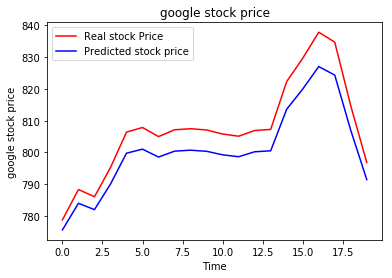

In [21]:
plt.plot(real_price, color = 'red', label = "Real stock Price")
plt.plot(predicted_price, color = 'blue', label = "Predicted stock price")
plt.title("google stock price")
plt.xlabel("Time")
plt.ylabel("google stock price")
plt.legend()
plt.show()